# 量子近似优化算法

<em> Copyright (c) 2021 Institute for Quantum Computing, Baidu Inc. All Rights Reserved. </em>

## 概览

量子近似优化算法（Quantum Approximate Optimization Algorithm, QAOA）是可以在近期的有噪中等规模量子（Noisy Intermediate-Scale Quantum, NISQ）设备上运行且具有广泛应用前景的量子算法。QAOA 由 Edward Farhi 等人于 2014 年提出[1]，其目的是近似地求解组合优化问题（combinatorial optimization problems）。

### 组合优化问题

在应用数学和理论计算机科学的领域中，组合优化是在一个有限的对象集中找出最优对象的一类课题。简单来说，组合优化问题是指问题的所有解是由离散变量组成的，然后在离散的解集中寻找最优解。组合优化问题涉及的范围很广，且常见于实际生活中，例如飞机航线的设计、快递物流路线的规划等。

具体来说，一个组合优化问题可以由 $n$ 个比特（bit）和 $m$ 个子句（clause）描述。每个比特的取值为 $0$ 或 $1$，我们用 $z_j$ 表示第 $j$ 个比特的取值。因此，这 $n$ 个比特的取值可以由比特串 $z=z_1z_2\dots z_n$ 表示。每个子句都是对部分比特的一个限制条件，例如一个子句可以要求第 $2$ 个比特的取值为 $0$，或者可以要求第 $3$ 个比特和第 $5$ 个比特的取值相同，等等。对于第 $j$ 个子句，我们定义一个与之相关的函数

$$
C_j(z)=
\begin{cases}
1 & \text{如果 $n$ 个比特的取值 $z$ 满足子句 $j$ 表明的条件}\\
0 & \text{如果 $n$ 个比特的取值 $z$ 不满足子句 $j$ 表明的条件}
\end{cases}.
\tag{1}
$$

例如，如果第一个子句要求第二个比特的取值为 0，那么我们有 $C_1(z_10z_3\dots z_n)=1$ 和 $C_1(z_11z_3\dots z_n)=0$。

由公式（1）中我们对于每个子句定义的函数 $C_j$，我们可以定义该组合优化问题的目标函数（objective function）

$$
C(z)=\sum_{j=1}^m w_jC_j(z),
\tag{2}
$$

其中 $w_j$ 是第 $j$ 个子句的权重（weight）。组合优化问题就是要找到一个取值 $z$ 使得目标函数 $C(z)$ 的值最大，即

$$
\underset{z}{\operatorname{argmax}} C(z).
\tag{3}
$$

### 量子近似优化算法

在实际生活中，许多组合优化问题都属于 NP 完全（NP-complete）问题甚至是 NP 困难（NP-hard）问题，这意味着计算机很可能无法高效地解决这样的问题。此时，一种替代方案便是寻找这类问题的近似最优解，而这样的任务通常是可以高效完成的。QAOA 就是一个可以寻找到一个组合优化问题的近似最优解的量子算法。

#### 编码组合优化问题

对于上述的一个组合优化问题，有 $n$ 个比特和 $m$ 个子句。QAOA 算法将这个问题转化为了在 $n$ 个量子比特系统上的优化问题，该量子系统的每个计算基态 $|z\rangle \in \{0,1\}^n$ 对应着原问题中 $n$ 个比特的一种取值 $z$。同时，对于原问题中的第 $j$ 个子句，我们定义一个对角（diagonal）哈密顿量 $H_{C_j}$ 使其满足

$$
H_{C_j}|z\rangle = C_j(z)|z\rangle.
\tag{4}
$$

具体我们可以通过下式来构造哈密顿量 $H_{C_j}$：

$$
H_{C_j} = \sum_{z\in\{0,1\}^n} C_j(z)|z\rangle\langle z|.
\tag{5}
$$

例如，假设满足第 $j$ 个子句的取值有 $z^{(1)}$ 和 $z^{(2)}$，那么我们可以定义

$$
H_{C_j} = |z^{(1)}\rangle\langle z^{(1)}| + |z^{(2)}\rangle\langle z^{(2)}|.
\tag{6}
$$

由此，QAOA 将组合优化问题的目标函数 $C$ 编码成了 $n$ 个量子比特系统上的哈密顿量

$$
H_C = \sum_{j=1}^m w_jH_{C_j},
\tag{7}
$$

并且

$$
H_C|z\rangle = \sum_{j=1}^m w_jH_{C_j}|z\rangle = \sum_{j=1}^m w_jC_j(z)|z\rangle = C(z)|z\rangle.
\tag{8}
$$

值得注意的是，假设原问题的一个最优解是 $z_\text{opt}$，那么我们有

$$
\langle z_\text{opt}|H_C|z_\text{opt}\rangle = \langle z_\text{opt}|C(z_\text{opt})|z_\text{opt}\rangle = C(z_\text{opt})\langle z_\text{opt}|z_\text{opt}\rangle = C(z_\text{opt}).
\tag{9}
$$

因此，原组合优化问题的最优解是哈密顿量 $H_C$ 的一个拥有最大本征值（eigenvalue）的本征态（eigenstate）。此外，对于任意量子态 $|\psi\rangle$，

$$
\langle\psi|H_C|\psi\rangle \leq C(z_\text{opt}),
\tag{10}
$$

且该式取等号当且仅当 $|\psi\rangle$ 是几个最优解的叠加态。由式（9）和式（10）可以得到，

$$
\max_{|\psi\rangle} \langle\psi|H_C|\psi\rangle = C(z_\text{opt})，
\tag{11}
$$

并且寻找原组合优化问题的最优解等同于寻找哈密顿量 $H_C$ 的一个拥有最大本征值的本征态，即寻找一个量子态 $|\psi\rangle$ 使得

$$
H_c|\psi\rangle = C(z_\text{opt})|\psi\rangle.
\tag{12}
$$

找到这样一个量子态 $|\psi\rangle$ 后，它很可能并不是一个计算基态，而是几个计算基态的叠加，这其中的每个计算基态都是原组合优化问题的一个最优解。因此，我们对 $|\psi\rangle$ 进行计算基上的测量，便能得到原组合优化问题的一个最优解。


#### 寻找近似最优解

尽管将要解决的组合优化问题的目标函数编码成一个量子系统的哈密顿量 $H_C$ 较为简单，但想要根据式（11）从偌大的希尔伯特空间中找到代表最优解的量子态 $|\psi\rangle$ 并不容易。为了找到这样一个量子态，我们需要借助另一个哈密顿量

$$
H_B = \sum_{j=1}^n X_j,
\tag{13}
$$

其中 $X_j$ 表示作用在第 $j$ 个量子比特上的 Pauli $X$ 门。Pauli $X$ 门的两个本征态分别是 $|+\rangle$ 和 $|-\rangle$，它们对应的本征值分别是 $1$ 和 $-1$：

$$
\begin{align}
X|+\rangle &=
\begin{bmatrix}
0&1\\1&0
\end{bmatrix}
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1\\1
\end{bmatrix}
= \frac{1}{\sqrt{2}}
\begin{bmatrix}
1\\1
\end{bmatrix}
= |+\rangle,\tag{14}\\
X|-\rangle &=
\begin{bmatrix}
0&1\\1&0
\end{bmatrix}
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1\\-1
\end{bmatrix}
= \frac{1}{\sqrt{2}}
\begin{bmatrix}
-1\\1
\end{bmatrix}
= -|-\rangle.\tag{15}
\end{align}
$$

因此，$H_B$ 的拥有最大本征值的本征态为

$$
|s\rangle \equiv \underbrace{|+\rangle\otimes\cdots\otimes|+\rangle}_{\text{共 $n$ 个 }|+\rangle} = |+\rangle^{\otimes n}.
\tag{16}
$$

我们将把这个量子态 $|s\rangle$ 作为算法的初始态。构造出哈密顿量 $H_C$ 和 $H_B$ 后，我们就可以开始寻找原组合优化问题的一个近似最优解了。根据哈密顿量 $H_C$ 和 $H_B$，分别定义酉变换

$$
U_C(\gamma) = e^{-i\gamma H_C}
\tag{17}
$$

和酉变换

$$
U_B(\beta) = e^{-i\beta H_B},
\tag{18}
$$

其中 $\gamma$ 和 $\beta$ 是实数，为可调节的参数。给定任意一个整数 $p\geq1$ 以及参数 $\vec{\gamma}=(\gamma_1,\dots,\gamma_p)$ 和 $\vec{\beta}=(\beta_1,\dots,\beta_p)$，我们定义

$$
|\vec{\gamma},\vec{\beta}\rangle = U_B(\beta_p)U_C(\gamma_p)\cdots U_B(\beta_1)U_C(\gamma_1)|s\rangle.
\tag{19}
$$

可以看到，整数 $p$ 表示用到的 $U_C,U_B$ 的层数，即分别将 $U_C$ 和 $U_B$ 交替地作用在初始态 $|s\rangle$ 上 $p$ 次。我们记 $F_p(\vec{\gamma},\vec{\beta})$ 为哈密顿量 $H_C$ 在式（19）的量子态下的期望值，

$$
F_p(\vec{\gamma},\vec{\beta}) = \langle\vec{\gamma},\vec{\beta}|H_C|\vec{\gamma},\vec{\beta}\rangle.
\tag{20}
$$

通过调整参数 $\vec{\gamma},\vec{\beta}$，我们可以得到

$$
M_p = \max_{\vec{\gamma},\vec{\beta}} F_p(\vec{\gamma},\vec{\beta})
\tag{21}
$$

作为给定层数 $p$ 下的近似最优解。至此，我们将寻找量子态 $|\psi\rangle$ 的问题转变为了搜寻参数 $\vec{\gamma},\vec{\beta}$ 的问题。值得注意的是，$p$ 层酉变换 $U_C,U_B$ 的表达能力强于 $p-1$ 层的表达能力，因此

$$
M_p \geq M_{p-1}.
\tag{22}
$$

事实上，当 $p$ 足够大时，

$$
\lim_{p\to\infty} M_p = \max_z C(z).
\tag{23}
$$



#### 解码量子答案

在上一段中，尽管我们将寻找量子态 $|\psi\rangle$ 转变为了寻找参数化量子态 $|\vec{\gamma},\vec{\beta}\rangle$ 以方便我们的搜索，但同时我们也缩小了搜索的空间，也就是说，在给定层数 $p$ 的情况下，可能并不存在参数 $\vec{\gamma},\vec{\beta}$ 使得 $F_p(\vec{\gamma},\vec{\beta}) = C(z_\text{opt})$。假设参数 $\vec{\gamma}^*$ 和 $\vec{\beta}^*$ 使得 $F_p$ 最大，即 $F_p(\vec{\gamma}^*,\vec{\beta}^*) = M_p$，那么在理想情况下量子态 $|\vec{\gamma}^*,\vec{\beta}^*\rangle$ 包含了最优解的信息。但要注意的是，这里只使用了 $p$ 层，因此很可能 $M_p < C(z_\text{opt})$。因此，一般情况下 $|\vec{\gamma}^*,\vec{\beta}^*\rangle$ 只包含了近似最优解的信息。进一步地，我们假设量子态 $|\vec{\gamma}^*,\vec{\beta}^*\rangle$ 是 $l$ 个计算基态的叠加态，即

$$
|\vec{\gamma}^*,\vec{\beta}^*\rangle = c_1|z^{(1)}\rangle + \cdots + c_l|z^{(l)}\rangle.
\tag{24}
$$

通常情况下，一个态 $|z^{(j)}\rangle$ 在计算基上测量得到的概率 $|c_j|^2$ 越大，意味着其对应的比特串 $z^{(j)}$ 是最优解的可能性越大。那么我们制备 $|\vec{\gamma}^*,\vec{\beta}^*\rangle$ 并测量，得到一个比特串 $z$ 并计算 $C(z)$ 的值。重复多次这个过程，便能得到一个 $z$ 使得 $C(z)$ 接近甚至超过 $M_p$。

#### 绝热定理

为什么可以用上述的方法来构造量子态 $|\vec{\gamma},\vec{\beta}\rangle$？ QAOA 试图找到一个优化问题的近似最优解，一个与之类似的算法是量子绝热算法 [2]（Quantum Adiabatic Algorithm, QAA）。但不同的是，QAA 是为了找到优化问题的最优解而非近似最优解。与 QAOA 类似，QAA 将一个优化问题转化为了求一个哈密顿量的基态的问题，并利用绝热定理（adiabatic theorem）对其求解。考虑一个量子系统的哈密顿量

$$
H(t) = (1-\frac tT)H_B + \frac tT H_C,
\tag{25}
$$

初始时，时间 $t=0$，该系统的哈密顿量为 $H(0) = H_B$。随着时间的流逝，该系统的哈密顿量逐渐由 $H_B$ 变为 $H_C$。当 $t=T$ 时，该系统的哈密顿量变为 $H(T) = H_C$。量子力学中的绝热定理告诉我们，如果初始时该系统处于 $H_B$ 的一个本征态，那么只要时间 $T$ 足够长，当系统的哈密顿量完全演化为 $H_C$ 时，该系统会处于 $H_C$ 的对应能级的本征态。因此，如果初始时该系统处于 $|s\rangle$，即 $H_B$ 拥有最大本征值的本征态，经过足够长的演化时间 $T$，该系统的量子态会变为 $H_C$ 拥有最大本征值的本征态。[3]

一种模拟哈密顿量 $H(t)$ 随着时间 $t$ 演化的方法便是交替地在该量子系统上作用酉变换 $U_C(\gamma)$ 和 $U_B(\beta)$，而模拟的精度取决于 $\gamma,\beta$ 的取值。另外，为了让系统的演化遵循绝热定理，需要足够长的演化时间，所以要求 $p$ 的取值足够大。因此，结合公式（22）可以推出公式（23）中的结论。

### 示例：QAOA 求解最大割问题

最大割问题（Max-Cut Problem）是图论中常见的一个组合优化问题，在统计物理学和电路设计中都有重要应用。最大割问题是一个 NP 完全问题，因此目前并不存在一个高效的算法能完美地解决该问题。

#### 最大割问题

在图论中，一个图是由一对集合 $G=(V, E)$ 表示，其中集合 $V$ 中的元素为该图的顶点，集合 $E$ 中的每个元素是一对顶点，表示连接这两个顶点的一条边。例如下方图片中的图可以由 $V=\{0,1,2,3\}$ 和 $E=\{(0,1),(1,2),(2,3),(3,0)\}$ 表示。

![G](figures/qaoa-fig-maxcut_g.png "图 1：一个有四个顶点和四条边的图")
<div style="text-align:center">图 1：一个有四个顶点和四条边的图 </div>


一个图上的割（cut）是指将该图的顶点集 $V$ 分割成两个互不相交的集合的一种划分，每个割都对应一个边的集合，这些边的两个顶点被划分在不同的集合中。于是我们可以将这个割的大小定义为这个边的集合的大小，即被割开的边的条数。最大割问题就是要找到一个割使得被割开的边的条数最多。图 2 展示了图 1 中图的一个最大割，该最大割的大小为 $4$，即割开了图中所有的边。

![Max cut on G](figures/qaoa-fig-maxcut_cut.png "图 2：图 1 中图的一个最大割")
<div style="text-align:center">图 2：图 1 中图的一个最大割 </div>


假设输入的图 $G=(V, E)$ 有 $n=|V|$ 个顶点和 $m=|E|$ 条边，那么我们可以将最大割问题描述为 $n$ 个比特和 $m$ 个子句的组合优化问题。每个比特对应图 $G$ 中的一个顶点 $v$，其取值 $z_v$ 为 $0$ 或 $1$，分别对应该顶点属于集合 $S_{0}$ 或 $S_{1}$，因此这 $n$ 个比特的每种取值 $z$ 都对应一个割。每个子句则对应图 $G$ 中的一条边 $(u,v)$，一个子句要求其对应的边连接的两个顶点的取值不同，即 $z_u\neq z_v$，表示该条边被割开。也就是说，当该条边连接这的两个顶点被割划分到不同的集合上时，我们说该子句被满足。因此，对于图 $G$ 中的每条边 $(u,v)$，我们有

$$
C_{(u,v)}(z) = z_u+z_v-2z_uz_v,
\tag{26}
$$

其中 $C_{(u,v)}(z) = 1$ 当且仅当该条边被割开。否则，该函数等于 $0$。整个组合优化问题的目标函数是

$$
C(z) = \sum_{(u,v)\in E}C_{(u,v)}(z) = \sum_{(u,v)\in E}z_u+z_v-2z_uz_v.
\tag{27}
$$

因此，解决最大割问题就是要找到一个取值 $z$ 使得公式（27）中的目标函数最大。



#### 编码最大割问题

这里我们以最大割问题为例来进一步阐述 QAOA。为了将最大割问题转化为一个量子问题，我们要用到 $n$ 个量子比特，每个量子比特对应图 $G$ 中的一个顶点。一个量子比特处于量子态 $|0\rangle$ 或 $|1\rangle$，表示其对应的顶点属于集合 $S_{0}$ 或 $S_{1}$。值得注意的是，$|0\rangle$ 和 $|1\rangle$ 是 Pauli $Z$ 门的两个本征态，并且它们的本征值分别为 $1$ 和 $-1$，即

$$
\begin{align}
Z|0\rangle&=|0\rangle,\tag{28}\\
Z|1\rangle&=-|1\rangle.\tag{29}
\end{align}
$$

因此我们可以使用 Pauli $Z$ 门来构建该最大割问题的哈密顿量 $H_C$。因为通过映射 $f(x):x\to(x+1)/2$ 可以将 $-1$ 映射到 $0$ 上 并且仍将 $1$ 映射到 $1$ 上，所以我们可以将式（27）中的 $z$ 替换为 $(Z+I)/2$（$I$ 是单位矩阵），得到原问题目标函数对应的哈密顿量

$$
\begin{align}
H_C &= \sum_{(u,v)\in E} \frac{Z_u+I}{2} + \frac{Z_v+I}{2} - 2\cdot\frac{Z_u+I}{2}\frac{Z_v+I}{2}\tag{30}\\
&= \sum_{(u,v)\in E} \frac{Z_u+Z_v+2I - (Z_uZ_v+Z_u+Z_v+I)}{2}\tag{31}\\
&= \sum_{(u,v)\in E} \frac{I - Z_uZ_v}{2}.\tag{32}
\end{align}
$$

该哈密顿量关于一个量子态 $|\psi\rangle$ 的期望值为

$$
\begin{align}
\langle\psi|H_C|\psi\rangle &= \langle\psi|\sum_{(u,v)\in E} \frac{I - Z_uZ_v}{2}|\psi\rangle\tag{33}\\
&= \langle\psi|\sum_{(u,v)\in E} \frac{I}{2}|\psi\rangle - \langle\psi|\sum_{(u,v)\in E} \frac{Z_uZ_v}{2}|\psi\rangle\tag{34}\\
&= \frac{|E|}{2} - \frac{1}{2}\langle\psi|\sum_{(u,v)\in E} Z_uZ_v|\psi\rangle.\tag{35}
\end{align}
$$

如果我们记

$$
H_D = -\sum_{(u,v)\in E} Z_uZ_v,
\tag{36}
$$

那么找到量子态 $|\psi\rangle$ 使得 $\langle\psi|H_C|\psi\rangle$ 最大等价于找到量子态 $|\psi\rangle$ 使得 $\langle\psi|H_D|\psi\rangle$ 最大。



## Paddle Quantum 实现

我们以最大割问题为例，用量桨实现 QAOA 算法求解最大割问题。有许多方法可以找到参数 $\vec{\gamma},\vec{\beta}$，我们这里使用经典机器学习中的梯度下降方法。

要在量桨上实现 QAOA，首先要做的便是加载需要用到的包。其中 `networkx` 包可以帮助我们方便地处理图。



In [1]:
# 加载量桨、飞桨的相关模块
from paddle import fluid
from paddle_quantum.circuit import UAnsatz
from paddle_quantum.utils import pauli_str_to_matrix

# 加载额外需要用到的包
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
import networkx as nx

接下来，我们生成该最大割问题中的图 $G$。为了运算方便，这里的顶点从 $0$ 开始计数。


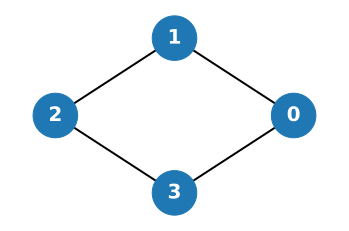

In [2]:
# n 是图 G 的顶点数，同时也是量子比特的个数
n = 4
G = nx.Graph()
V = range(n)
E = [(0, 1), (1, 2), (2, 3), (3, 0)]
G.add_edges_from(E)

# 将生成的图 G 打印出来
pos = nx.circular_layout(G)
options = {
    "with_labels": True,
    "font_size": 20,
    "font_weight": "bold",
    "font_color": "white",
    "node_size": 2000,
    "width": 2
}
nx.draw_networkx(G, pos, **options)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

### 编码哈密顿量

量桨中，哈密顿量可以以 `list` 的形式输入。这里我们构建式（36）中的哈密顿量 $H_D$。

In [3]:
# 以 list 的形式构建哈密顿量 H_D
H_D_list = []
for (u, v) in E:
    H_D_list.append([-1.0, 'z'+str(u) + ',z' + str(v)])
print(H_D_list)

[[-1.0, 'z0,z1'], [-1.0, 'z1,z2'], [-1.0, 'z2,z3'], [-1.0, 'z3,z0']]


可以看到，在这个例子中，哈密顿量 $H_D$ 为

$$
H_D = -Z_0Z_1 - Z_1Z_2 - Z_2Z_3 - Z_3Z_0.
\tag{37}
$$

我们可以查看哈密顿量 $H_D$ 的矩阵形式，并且获取它的本征值信息：

In [4]:
# 将哈密顿量 H_D 从 list 形式转为矩阵形式
H_D_matrix = pauli_str_to_matrix(H_D_list, n)
# 取出 H_D 对角线上的元素
H_D_diag = np.diag(H_D_matrix).real
# 获取 H_D 的最大本征值
H_max = np.max(H_D_diag)

print(H_D_diag)
print('H_max:', H_max)

[-4.  0.  0.  0.  0.  4.  0.  0.  0.  0.  4.  0.  0.  0.  0. -4.]
H_max: 4.0


### 搭建 QAOA 电路

前面我们介绍了 QAOA 需要将两个酉变换 $U_C(\gamma)$ 和 $U_B(\beta)$ 交替地作用在初始态 $|s\rangle = |+\rangle^{\otimes n}$ 上。在这里，我们使用量桨中提供的量子门和量子电路模板搭建出一个量子电路来实现这一步骤。要注意的是，在最大割问题中，我们将最大化哈密顿量 $H_C$ 的期望值的问题简化为了最大化哈密顿量 $H_D$ 的期望值的问题，因此要用到的酉变换也就变成了 $U_D(\gamma)$ 和 $U_B(\beta)$。通过交替地摆放两个参数可调的电路模块，我们得以搭建QAOA电路

$$
U_B(\beta_p)U_D(\gamma_p)\cdots U_B(\beta_1)U_D(\gamma_1),
\tag{38}
$$

其中，$U_D(\gamma) = e^{-i\gamma H_D}$ 可以由下图中的电路搭建实现。另一个酉变换 $U_B(\beta)$ 则等价于在每个量子比特上作用一个 $R_x$ 门。

![U_D circuit](figures/qaoa-fig-cir_ud.png "图 3：酉变换 $e^{i\gamma Z\otimes Z}$ 的量子电路实现")
<div style="text-align:center">图 3：酉变换 $e^{i\gamma Z\otimes Z}$ 的量子电路实现 </div>


因此，实现一层酉变换 $U_B(\beta)U_D(\gamma)$ 的量子电路如图 4 所示。

![U_BU_D circuit](figures/qaoa-fig-cir_ubud.png "图 4：酉变换 $U_B(\beta)U_D(\gamma)$ 的量子电路实现")
<div style="text-align:center">图 4：酉变换 $U_B(\beta)U_D(\gamma)$ 的量子电路实现 </div>

量桨中，电路运行前每个量子比特默认的初始状态为 $|0\rangle$（可以通过输入参数来自定义初始状态），我们可以通过添加一层 Hadamard 门使每个量子比特的状态由 $|0\rangle$ 变为 $|+\rangle$，由此得到 QAOA 要求的初始态 $|s\rangle = |+\rangle^{\otimes n}$。在量桨中，可以通过调用 `superposition_layer()` 在量子电路中添加一层 Hadamard 门。

In [5]:
def circuit_QAOA(p, gamma, beta):
    # 初始化 n 个量子比特的量子电路
    cir = UAnsatz(n)
    # 制备量子态 |s>
    cir.superposition_layer()
    # 搭建 p 层电路
    for layer in range(p):
        # 搭建 U_D 的电路
        for (u, v) in E:
            cir.cnot([u, v])
            cir.rz(gamma[layer], v)
            cir.cnot([u, v])

        # 搭建 U_B 的电路，即添加一层 R_x 门
        for v in V:
            cir.rx(beta[layer], v)

    return cir

搭建 QAOA 量子电路的工作完成后，如果运行该量子电路，得到的输出态为

$$
|\vec{\gamma},\vec{\beta}\rangle = U_B(\beta_p)U_D(\gamma_p)\cdots U_B(\beta_1)U_D(\gamma_1)|s\rangle.
\tag{39}
$$

### 计算损失函数

由上一步搭建的电路的输出态，我们可以计算最大割问题的目标函数

$$
F_p(\vec{\gamma},\vec{\beta}) = \langle\vec{\gamma},\vec{\beta}|H_D|\vec{\gamma},\vec{\beta}\rangle.
\tag{40}
$$

要最大化该目标函数等价于最小化 $-F_p$。因此我们定义 $L(\vec{\gamma},\vec{\beta}) = -F_p(\vec{\gamma},\vec{\beta})$ 为损失函数，即要最小化的函数，然后利用经典的优化算法寻找最优参数 $\vec{\gamma},\vec{\beta}$。下面的代码给出了通过量桨和飞桨搭建的完整 QAOA 网络：

In [6]:
class Net(fluid.dygraph.Layer):
    def __init__(
        self,
        p,
        param_attr=fluid.initializer.Uniform(low=0.0, high=np.pi, seed=1024),
        dtype="float64",
    ):
        super(Net, self).__init__()

        self.p = p
        self.gamma = self.create_parameter(shape=[self.p], attr=param_attr, dtype=dtype, is_bias=False)
        self.beta = self.create_parameter(shape=[self.p], attr=param_attr, dtype=dtype, is_bias=False)

    def forward(self):
        # 定义 QAOA 的量子电路
        cir = circuit_QAOA(self.p, self.gamma, self.beta)
        # 运行该量子电路
        cir.run_state_vector()
        # 计算损失函数
        loss = -cir.expecval(H_D_list)

        return loss, cir

### 训练量子神经网络
定义好了用于 QAOA 的量子神经网络后，我们使用梯度下降的方法来更新其中的参数，使得式（40）的期望值最大。

In [7]:
p = 4      # 量子电路的层数
ITR = 120  # 训练迭代的次数
LR = 0.1   # 基于梯度下降的优化方法的学习率

这里，我们在飞桨动态图中优化上面定义的网络。



In [8]:
with fluid.dygraph.guard():
    net = Net(p)
    # 使用 Adam 优化器
    opt = fluid.optimizer.AdamOptimizer(learning_rate=LR, parameter_list=net.parameters())
    # 梯度下降循环
    for itr in range(1, ITR + 1):
        # 运行上面定义的网络
        loss, cir = net()
        # 计算梯度并优化
        loss.backward()
        opt.minimize(loss)
        net.clear_gradients()
        if itr % 10 == 0:
            print("iter:", itr, "  loss:", "%.4f" % loss.numpy())

    gamma_opt = net.gamma.numpy()
    print("优化后的参数 gamma:\n", gamma_opt)
    beta_opt = net.beta.numpy()
    print("优化后的参数 beta:\n", beta_opt)

iter: 10   loss: -3.7473
iter: 20   loss: -3.9696
iter: 30   loss: -3.9539
iter: 40   loss: -3.9710
iter: 50   loss: -3.9930
iter: 60   loss: -3.9991
iter: 70   loss: -3.9984
iter: 80   loss: -3.9998
iter: 90   loss: -3.9998
iter: 100   loss: -4.0000
iter: 110   loss: -4.0000
iter: 120   loss: -4.0000
优化后的参数 gamma:
 [0.70063329 0.45026914 1.17355432 2.13276803]
优化后的参数 beta:
 [-0.02466894 -0.20348931  1.12024105  0.61099467]


### 解码量子答案
当求得损失函数的最小值以及相对应的一组参数 $\vec{\gamma}^*,\vec{\beta}^*$ 后，我们的任务还没有完成。为了进一步求得 Max-Cut 问题的近似解，需要从 QAOA 输出的量子态 $|\vec{\gamma}^*,\vec{\beta}^*\rangle$ 中解码出经典优化问题的答案。物理上，解码量子态需要对量子态进行测量，然后统计测量结果的概率分布：

$$
p(z)=|\langle z|\vec{\gamma}^*,\vec{\beta}^*\rangle|^2.
\tag{41}
$$

通常情况下，某个比特串出现的概率越大，意味着其对应 Max-Cut 问题最优解的可能性越大。

Paddle Quantum 提供了查看 QAOA 量子电路输出状态的测量结果概率分布的函数：

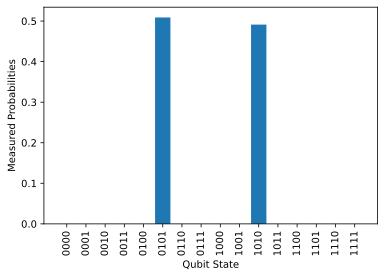

In [9]:
with fluid.dygraph.guard():
    # 模拟重复测量电路输出态 1024 次
    prob_measure = cir.measure(plot=True)

通过测量，找到出现几率最高的比特串。 此时，记其在该比特串中对应的比特取值为 $0$ 的顶点属于集合 $S_0$ 以及对应比特取值为 $1$ 的顶点属于集合 $S_1$，这两个顶点集合之间存在的边就是该图的一个可能的最大割方案。

下面的代码选取测量结果中出现几率最大的比特串，然后将其映射回经典解，并且画出对应的最大割方案：
- 红色顶点属于集合 $S_0$，
- 蓝色顶点属于集合 $S_1$，
- 虚线表示被割的边。

找到的割的比特串形式： 0101


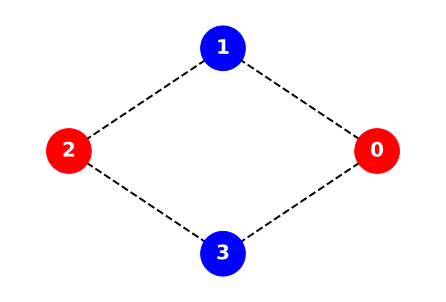

In [10]:
# 找到测量结果中出现几率最大的比特串
cut_bitstring = max(prob_measure, key=prob_measure.get)
print("找到的割的比特串形式：", cut_bitstring)

# 在图上画出上面得到的比特串对应的割
node_cut = ["blue" if cut_bitstring[v] == "1" else "red" for v in V]

edge_cut = [
    "solid" if cut_bitstring[u] == cut_bitstring[v] else "dashed"
    for (u, v) in E
    ]
nx.draw(
        G,
        pos,
        node_color=node_cut,
        style=edge_cut,
        **options
)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

可以看到，在这个例子中 QAOA 找到了图上的一个最大割。

_______

## 参考文献

[1] Farhi, E., Goldstone, J. & Gutmann, S. A Quantum Approximate Optimization Algorithm. [arXiv:1411.4028 (2014).](https://arxiv.org/abs/1411.4028)

[2] Farhi, E., Goldstone, J., Gutmann, S. & Sipser, M. Quantum computation by adiabatic evolution. [arXiv:quant-ph/0001106 (2000).](https://arxiv.org/abs/quant-ph/0001106)

[3] Duan, R. Quantum Adiabatic Theorem Revisited. [arXiv:2003.03063 (2020).](https://arxiv.org/abs/2003.03063)


